#                                                     **CAR PRICE PREDICTION**

### ***1.Importing Dependencies***

In [220]:
import pandas as pd #for python libraries
import matplotlib.pyplot as plt #visualisation library
import seaborn as sns #for data visualisation

In [221]:
from sklearn.model_selection import train_test_split #for splitting data into two parts; training and test data
from sklearn.linear_model import LinearRegression #for importing linear regression model
from sklearn.linear_model import Lasso #for importing lasso model
from sklearn import metrics #for finding the accuracy of the data
from sklearn.preprocessing import StandardScaler

### ***2.Data Collection and Processing***

### Description: 

The data set used here is called Car Data. It is a csv file that contains all the necessary details regarding important attributes such as Car Name, Purchase Year, Kms Driven, Transmission Type and many more. These attributes determine the method in which EDA is performed as well as the number of transformations applied to the dataset before inserting it into the models for training and testing

#### **1. Scheming through the attributes of dataset and identifying statistical measures**

In [222]:
car_dataset = pd.read_csv("C:/Users/zeelt/Desktop/Python Projects/Car Price Prediction/car_dataset.csv")

In [223]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [224]:
car_dataset.shape

(4340, 8)

In [225]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [226]:
car_dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


#### **2. Checking for missing values**

In [227]:
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

***Since there are no missing values in the dataset we don't need to remove any na values and thus use value_counts() to determine the count value of each attributes of the data set***

In [228]:
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [234]:
car_dataset.drop(car_dataset[car_dataset['fuel'] == 'LPG'].index, inplace=True)

In [235]:
car_dataset.drop(car_dataset[car_dataset['fuel'] == 'Electric'].index, inplace=True)

In [236]:
car_dataset.drop(car_dataset[car_dataset['owner'] == 'Test Drive Car'].index, inplace=True)

***We now convert certain categorical data in the dataset to numerical data using Label Encoding. Label Encoding is the process of providing categorical lables a numerical value that can be used to represent a particular categorical value when data is inserted into Machine Learning Models.***

In [240]:
car_dataset.replace({'fuel' : {"Petrol": 0 , "Diesel": 1 , "CNG" : 2}},inplace=True)
#We change values of petrol,diesel and cng to 0,1,2,3,4 respectively

#We change the values for seller type as well just as we did for fuel type
car_dataset.replace({'seller_type' : {"Dealer": 0 , "Individual": 1, "Trustmark Dealer": 2}},inplace=True)

#We change the values for Transmission into 0,1,2 values as well
car_dataset.replace({'transmission' : {"Manual": 0 , "Automatic": 1}},inplace=True)

#We change the values for Owner into 0,1,2 values as well
car_dataset.replace({'owner' : {"First Owner": 0, "Second Owner": 1, "Third Owner": 2, "Fourth & Above Owner": 3}},inplace=True)

In [241]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


### ***3.Splitting Data into Train and Test split***

In [262]:
#For performing splitting of data we take two vectors 'X' and 'Y'
X = car_dataset.drop(['name','selling_price', 'seller_type'],axis=1)
Y = car_dataset['selling_price'] #Y contains our target values

In [263]:
X.head()

,year,km_driven,fuel,transmission,owner
0,2007,70000,0,0,0
1,2007,50000,0,0,0
2,2012,100000,1,0,0
3,2017,46000,0,0,0
4,2014,141000,1,0,1


In [264]:
Y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

#### **1.Splitting Training and Test Data**

In [282]:
#We take 4 variables;
#Xtrain- contains all independent variables that are used to train the model
#Ytrain- it is the dependent variable,that the model predicts using independent variable X
#Xtest- the portion of independent variables which are used for testing(accuracy testing of model)
#Ytest- will be used to test the accuracy of actual values and the predicted values
# 0.1- denotes 10% testing data and remaining 90% data is training data

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",Y_train.shape)
print("y test: ",Y_test.shape)

x train:  (3869, 5)
x test:  (430, 5)
y train:  (3869,)
y test:  (430,)


### ***4. Model Training***



#### **1.   Linear Regression model**



In [287]:
#storing the LinearRegression() into a smaller variable called lin_reg_model
lin_reg_model = LinearRegression()

In [288]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

##### **A.Model Evaluation using Training Data**

In [285]:
#prediction using Training Data
training_data_prediction = lin_reg_model.predict(X_train)

In [286]:
#comparing the predicted values with the original values using R2 error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error: ",error_score)

R squared Error:  0.43982880489043497


***--->Visualizing the above Data***

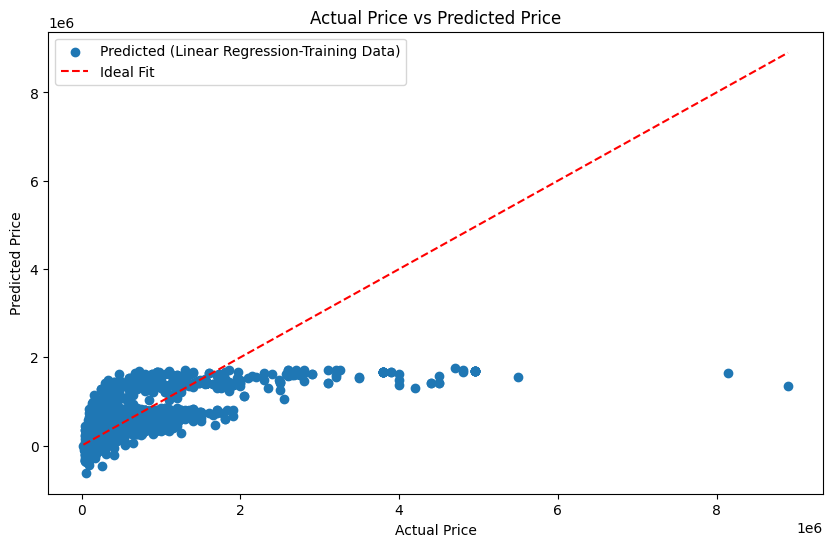

In [312]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, training_data_prediction,label='Predicted (Linear Regression-Training Data)')
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.legend()
plt.show()

##### **B.Accuracy Evaluation Using Test Data**


In [251]:
#test data prediction
test_data_prediction = lin_reg_model.predict(X_test)

In [252]:
#comparing the predicted values with the original values using R2 error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error: ",error_score)

R squared Error:  0.4732859474768284


***--->Visualising the above data***

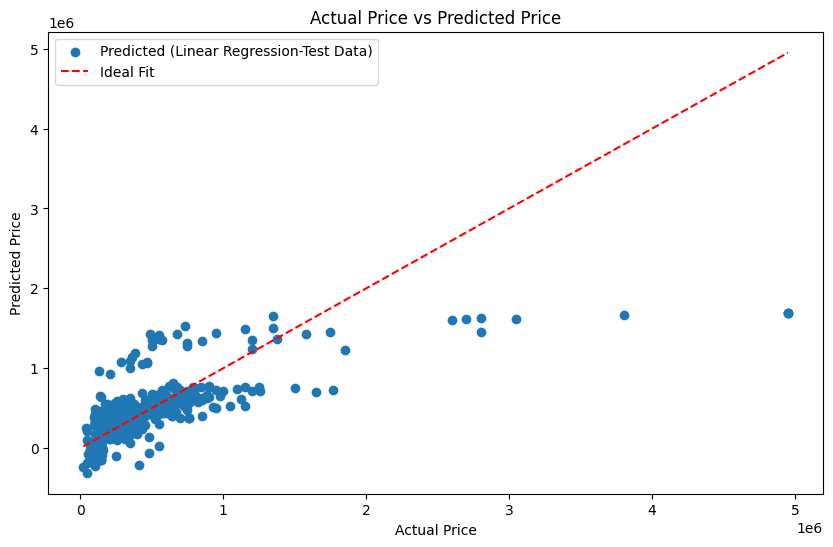

In [311]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_data_prediction,label='Predicted (Linear Regression-Test Data)')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.legend()
plt.show()


#### **2.   Lasso Regression**



In [297]:
#storing the LassoRegression() into a smaller variable called lin_reg_model
lass_reg_model = Lasso(alpha=0.1)

In [298]:
#fit function is used to train our model
lass_reg_model.fit(X_train,Y_train)

Lasso(alpha=0.1)

**A.Model Evaluation using Training Data**

In [299]:
#prediction using Training Data and storing it in training data prediction variable
training_data_prediction = lass_reg_model.predict(X_train)

In [300]:
#comparing the predicted values with the original values using R2 error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error: ",error_score)


R squared Error:  0.43982880488994436


***--->Visualizing the above Data***

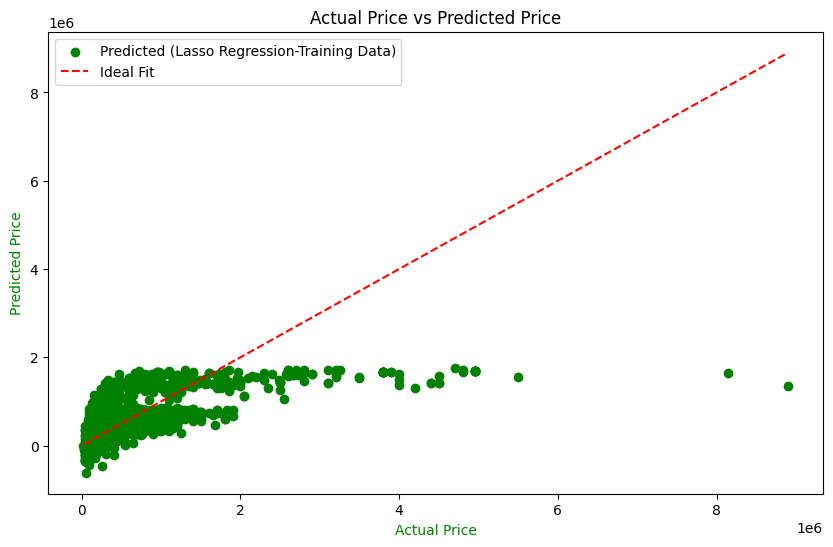

In [314]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, training_data_prediction, color='green', label='Predicted (Lasso Regression-Training Data)')
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel("Actual Price",color='green')
plt.ylabel("Predicted Price",color='green')
plt.title("Actual Price vs Predicted Price")
plt.legend()
plt.show()

**B.Accuracy Evaluation Using Test Data**


In [302]:
#test data prediction
test_data_prediction = lass_reg_model.predict(X_test)

In [303]:
#comparing the predicted values with the original values using R2 error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error: ",error_score)

R squared Error:  0.47205491354343854


***--->Visualising the above data***

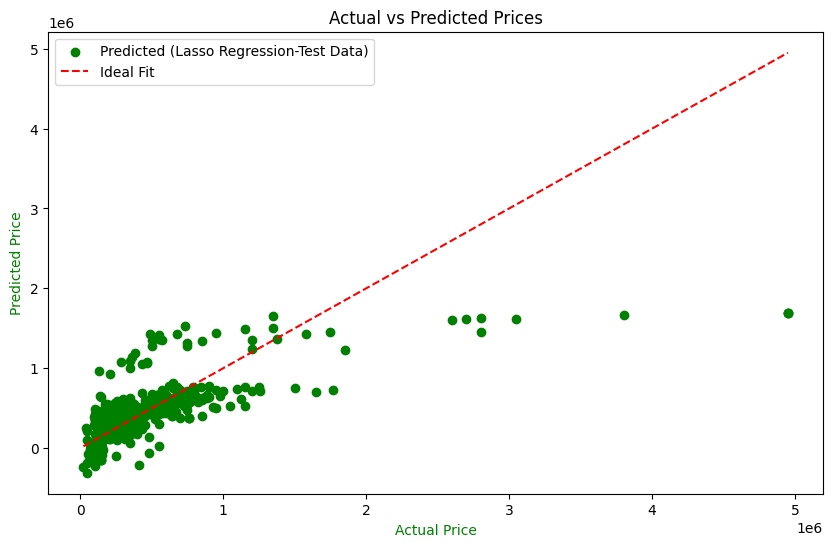

In [313]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_data_prediction, color='green', label='Predicted (Lasso Regression-Test Data)')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Price',color='green')
plt.ylabel('Predicted Price',color='green')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()